In [10]:
%load_ext autoreload
%autoreload 2

In [11]:
import doc_tool
import db_helper
import re
import nltk
import networkx as nx
from datetime import datetime
from node2vec import Node2Vec
import gensim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import importlib
from gensim.models.word2vec import Word2Vec as W2V

In [41]:
import n2v as N2V
import gc
gc.collect()

104

In [42]:
MODEL_NAME="friendship"
MODEL_PATH="../outputs/"+MODEL_NAME+".model"
GRAPH_PDF_PATH="../outputs/friendship.pdf"

In [43]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model.wv[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=50, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(30, 30)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [44]:
db = db_helper.DBHelper()
db.connect(user="root",passwd="Hasan5695*",db="cse496")

In [45]:
tweets = db.getTweets("denemeShort")

In [46]:
userIDs = db.getUniqueUserIDs("Friends")
friendIDs = db.getUserFriendIDs("Friends",userIDs[0])

In [47]:
print("UniqueUser #: ",len(userIDs))
print("Friend # of user:",userIDs[0]," is:",len(friendIDs))

UniqueUser #:  199
Friend # of user: 100341775  is: 612


In [48]:
# create friendship graph
startTime = datetime.now()
# I used DiGraph because of this state: 
#A follow B but B couldn't follow A, so there is no need to add edge
friendshipGraph=nx.DiGraph()

#run for first half of unique person and take half of friends
for userID in userIDs[:int(len(userIDs)/30)]:
    friendIDs = db.getUserFriendIDs("Friends",userID)
    for friendID in friendIDs[:int(len(friendIDs)/30)]:
        friendshipGraph.add_edge(userID,friendID,weight=1.0)
endTime = datetime.now()
print("Graph construct time: ",endTime-startTime)
print("# of edges:",friendshipGraph.number_of_edges())
print("# of nodes:",friendshipGraph.number_of_nodes())

Graph construct time:  0:00:01.286199
# of edges: 176
# of nodes: 180


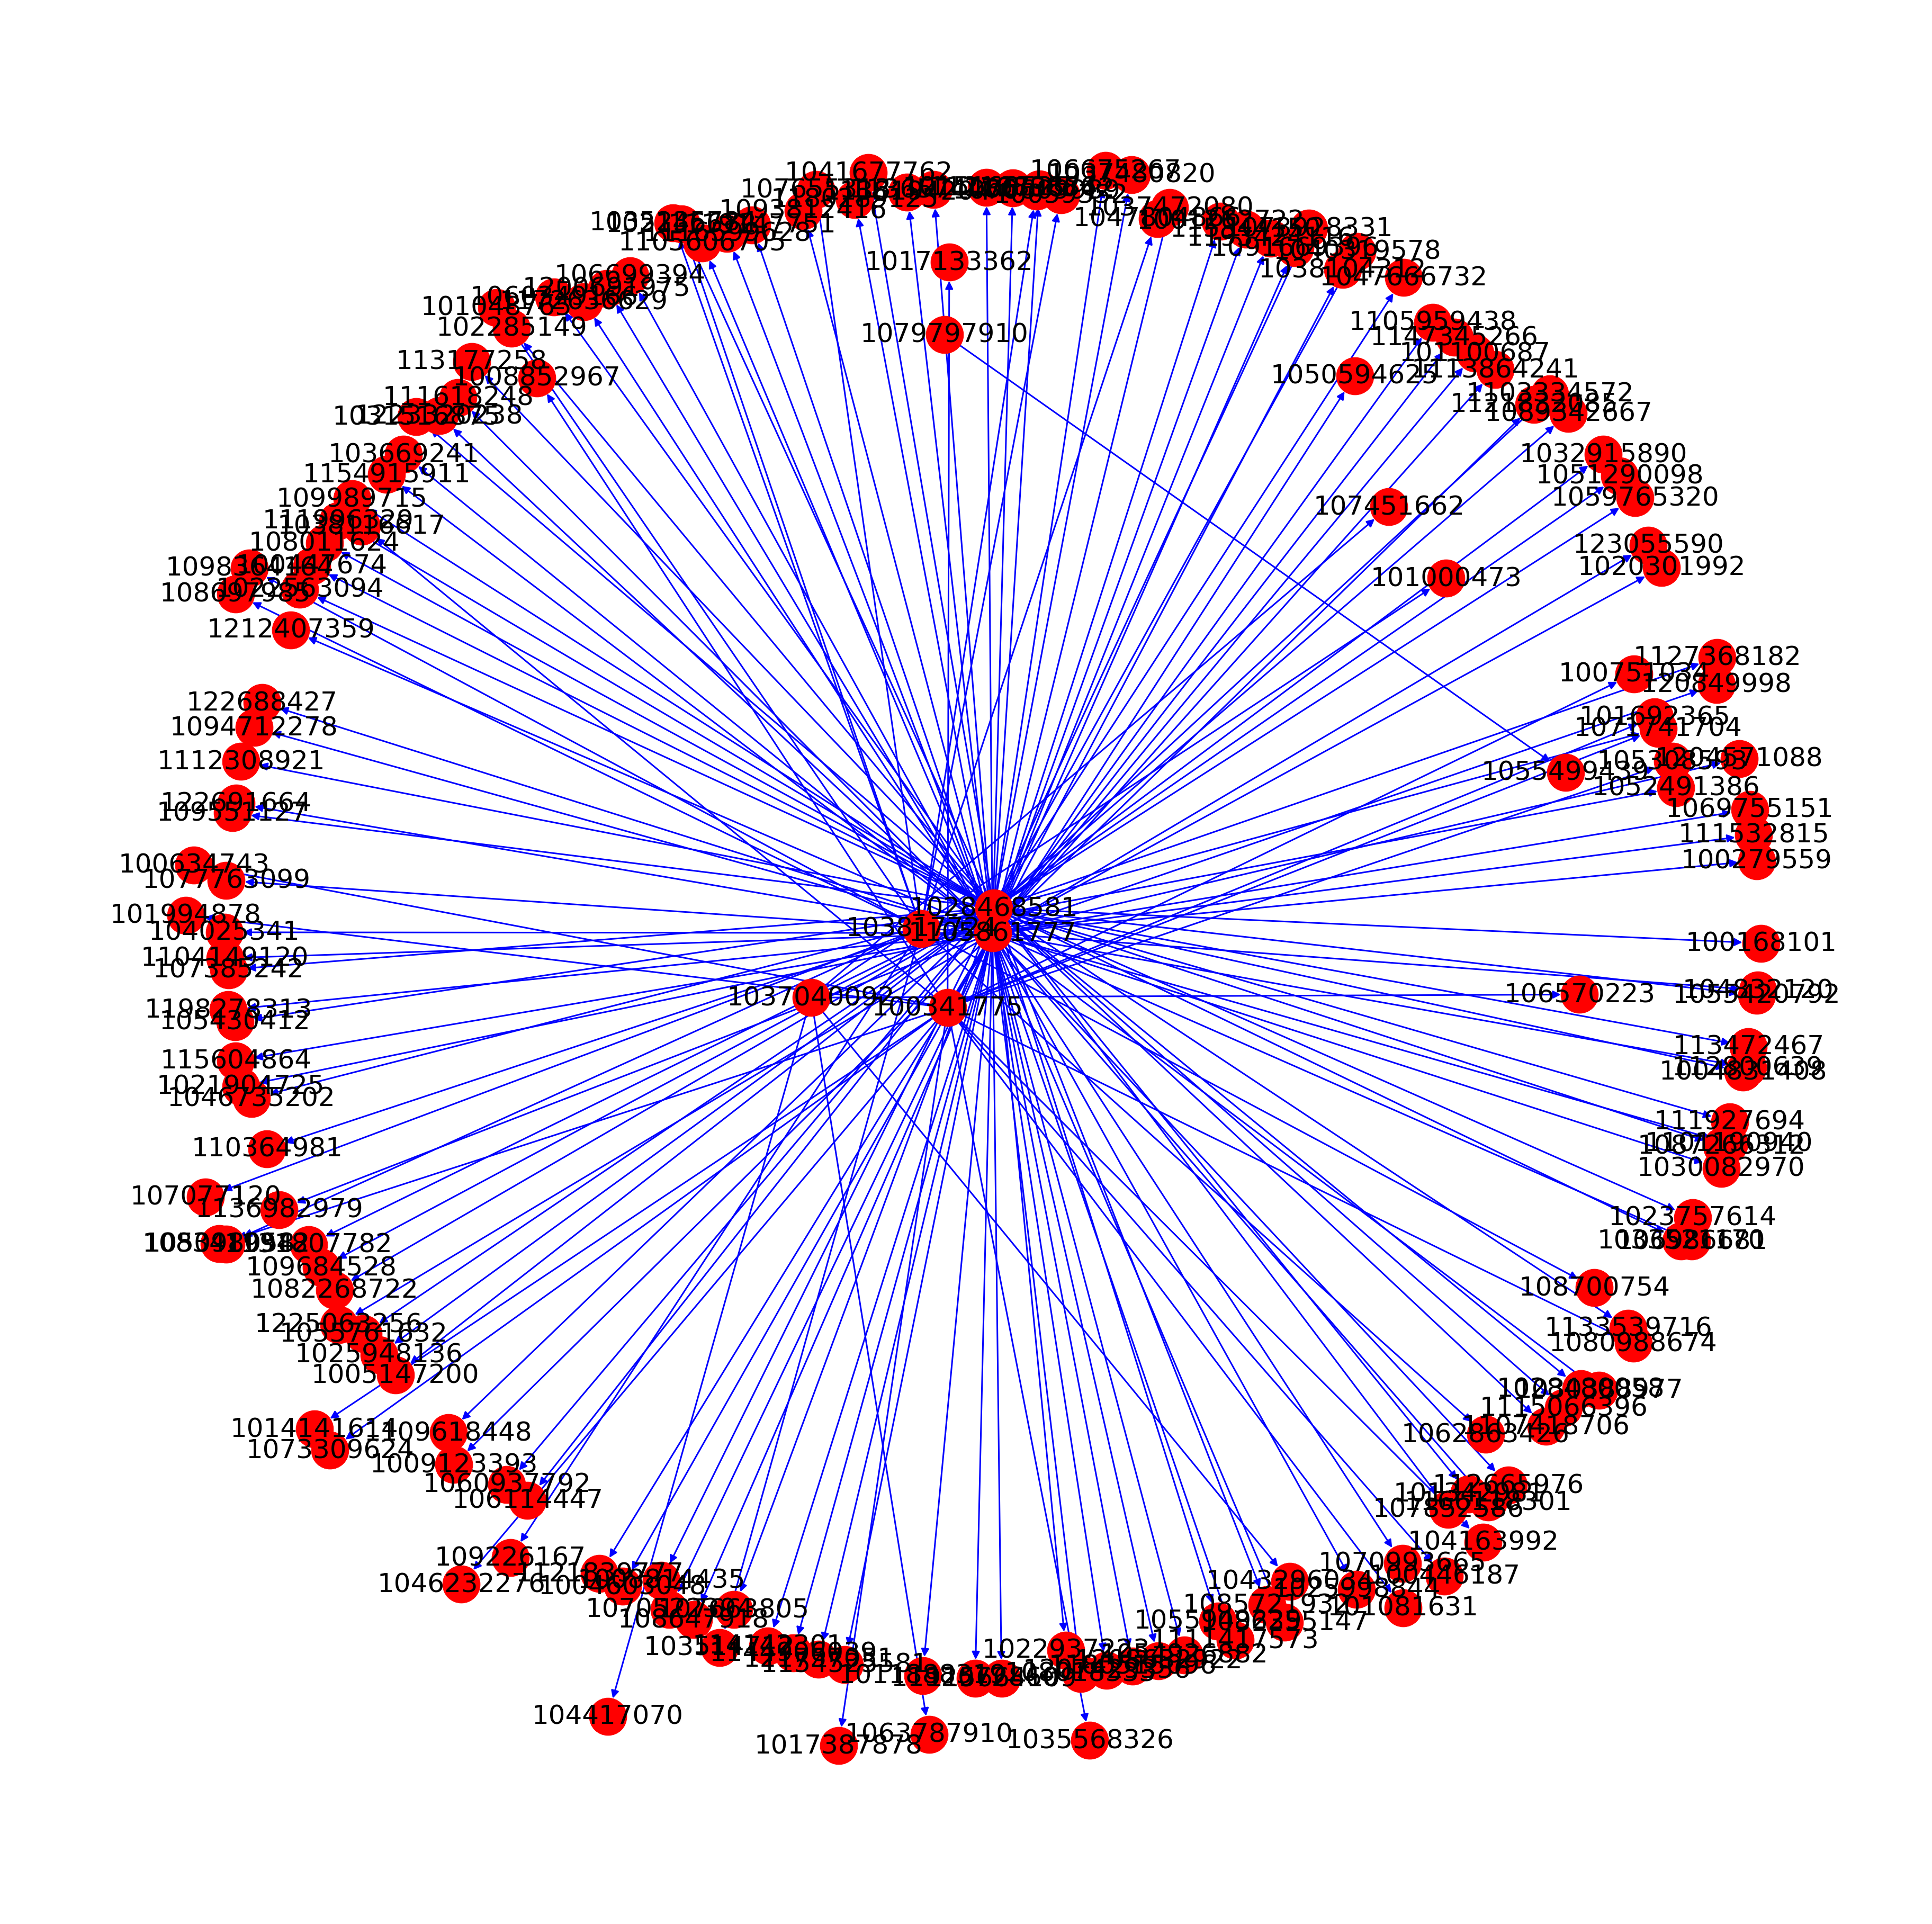

In [49]:
plt.figure(1, figsize=(50,50))
nx.draw_kamada_kawai(friendshipGraph,node_size=5000,font_size=50,with_labels=True, width=3, edge_color="b", arrows=True, arrowsize=30)
plt.savefig(GRAPH_PDF_PATH)
plt.show()

In [50]:
G = N2V.Graph(friendshipGraph, True, 1.0, 1.0)
G.preprocess_transition_probs()
walks = G.simulate_walks(1000, 80)
model = N2V.learn_embeddings(walks,MODEL_NAME)

Walk iteration:
1 / 1000
2 / 1000
3 / 1000
4 / 1000
5 / 1000
6 / 1000
7 / 1000
8 / 1000
9 / 1000
10 / 1000
11 / 1000
12 / 1000
13 / 1000
14 / 1000
15 / 1000
16 / 1000
17 / 1000
18 / 1000
19 / 1000
20 / 1000
21 / 1000
22 / 1000
23 / 1000
24 / 1000
25 / 1000
26 / 1000
27 / 1000
28 / 1000
29 / 1000
30 / 1000
31 / 1000
32 / 1000
33 / 1000
34 / 1000
35 / 1000
36 / 1000
37 / 1000
38 / 1000
39 / 1000
40 / 1000
41 / 1000
42 / 1000
43 / 1000
44 / 1000
45 / 1000
46 / 1000
47 / 1000
48 / 1000
49 / 1000
50 / 1000
51 / 1000
52 / 1000
53 / 1000
54 / 1000
55 / 1000
56 / 1000
57 / 1000
58 / 1000
59 / 1000
60 / 1000
61 / 1000
62 / 1000
63 / 1000
64 / 1000
65 / 1000
66 / 1000
67 / 1000
68 / 1000
69 / 1000
70 / 1000
71 / 1000
72 / 1000
73 / 1000
74 / 1000
75 / 1000
76 / 1000
77 / 1000
78 / 1000
79 / 1000
80 / 1000
81 / 1000
82 / 1000
83 / 1000
84 / 1000
85 / 1000
86 / 1000
87 / 1000
88 / 1000
89 / 1000
90 / 1000
91 / 1000
92 / 1000
93 / 1000
94 / 1000
95 / 1000
96 / 1000
97 / 1000
98 / 1000
99 / 1000
100

874 / 1000
875 / 1000
876 / 1000
877 / 1000
878 / 1000
879 / 1000
880 / 1000
881 / 1000
882 / 1000
883 / 1000
884 / 1000
885 / 1000
886 / 1000
887 / 1000
888 / 1000
889 / 1000
890 / 1000
891 / 1000
892 / 1000
893 / 1000
894 / 1000
895 / 1000
896 / 1000
897 / 1000
898 / 1000
899 / 1000
900 / 1000
901 / 1000
902 / 1000
903 / 1000
904 / 1000
905 / 1000
906 / 1000
907 / 1000
908 / 1000
909 / 1000
910 / 1000
911 / 1000
912 / 1000
913 / 1000
914 / 1000
915 / 1000
916 / 1000
917 / 1000
918 / 1000
919 / 1000
920 / 1000
921 / 1000
922 / 1000
923 / 1000
924 / 1000
925 / 1000
926 / 1000
927 / 1000
928 / 1000
929 / 1000
930 / 1000
931 / 1000
932 / 1000
933 / 1000
934 / 1000
935 / 1000
936 / 1000
937 / 1000
938 / 1000
939 / 1000
940 / 1000
941 / 1000
942 / 1000
943 / 1000
944 / 1000
945 / 1000
946 / 1000
947 / 1000
948 / 1000
949 / 1000
950 / 1000
951 / 1000
952 / 1000
953 / 1000
954 / 1000
955 / 1000
956 / 1000
957 / 1000
958 / 1000
959 / 1000
960 / 1000
961 / 1000
962 / 1000
963 / 1000
964 / 1000

In [51]:
model.wv.most_similar("1028468581")

[('1105861777', 0.9969251155853271),
 ('100341775', 0.9951112866401672),
 ('1071741704', 0.9945440292358398),
 ('108697985', 0.9937808513641357),
 ('102146672', 0.9935524463653564),
 ('109226167', 0.9931923151016235),
 ('1014141614', 0.9931396245956421),
 ('1073309624', 0.9930009841918945),
 ('1046232276', 0.992996096611023),
 ('105308593', 0.9927961826324463)]

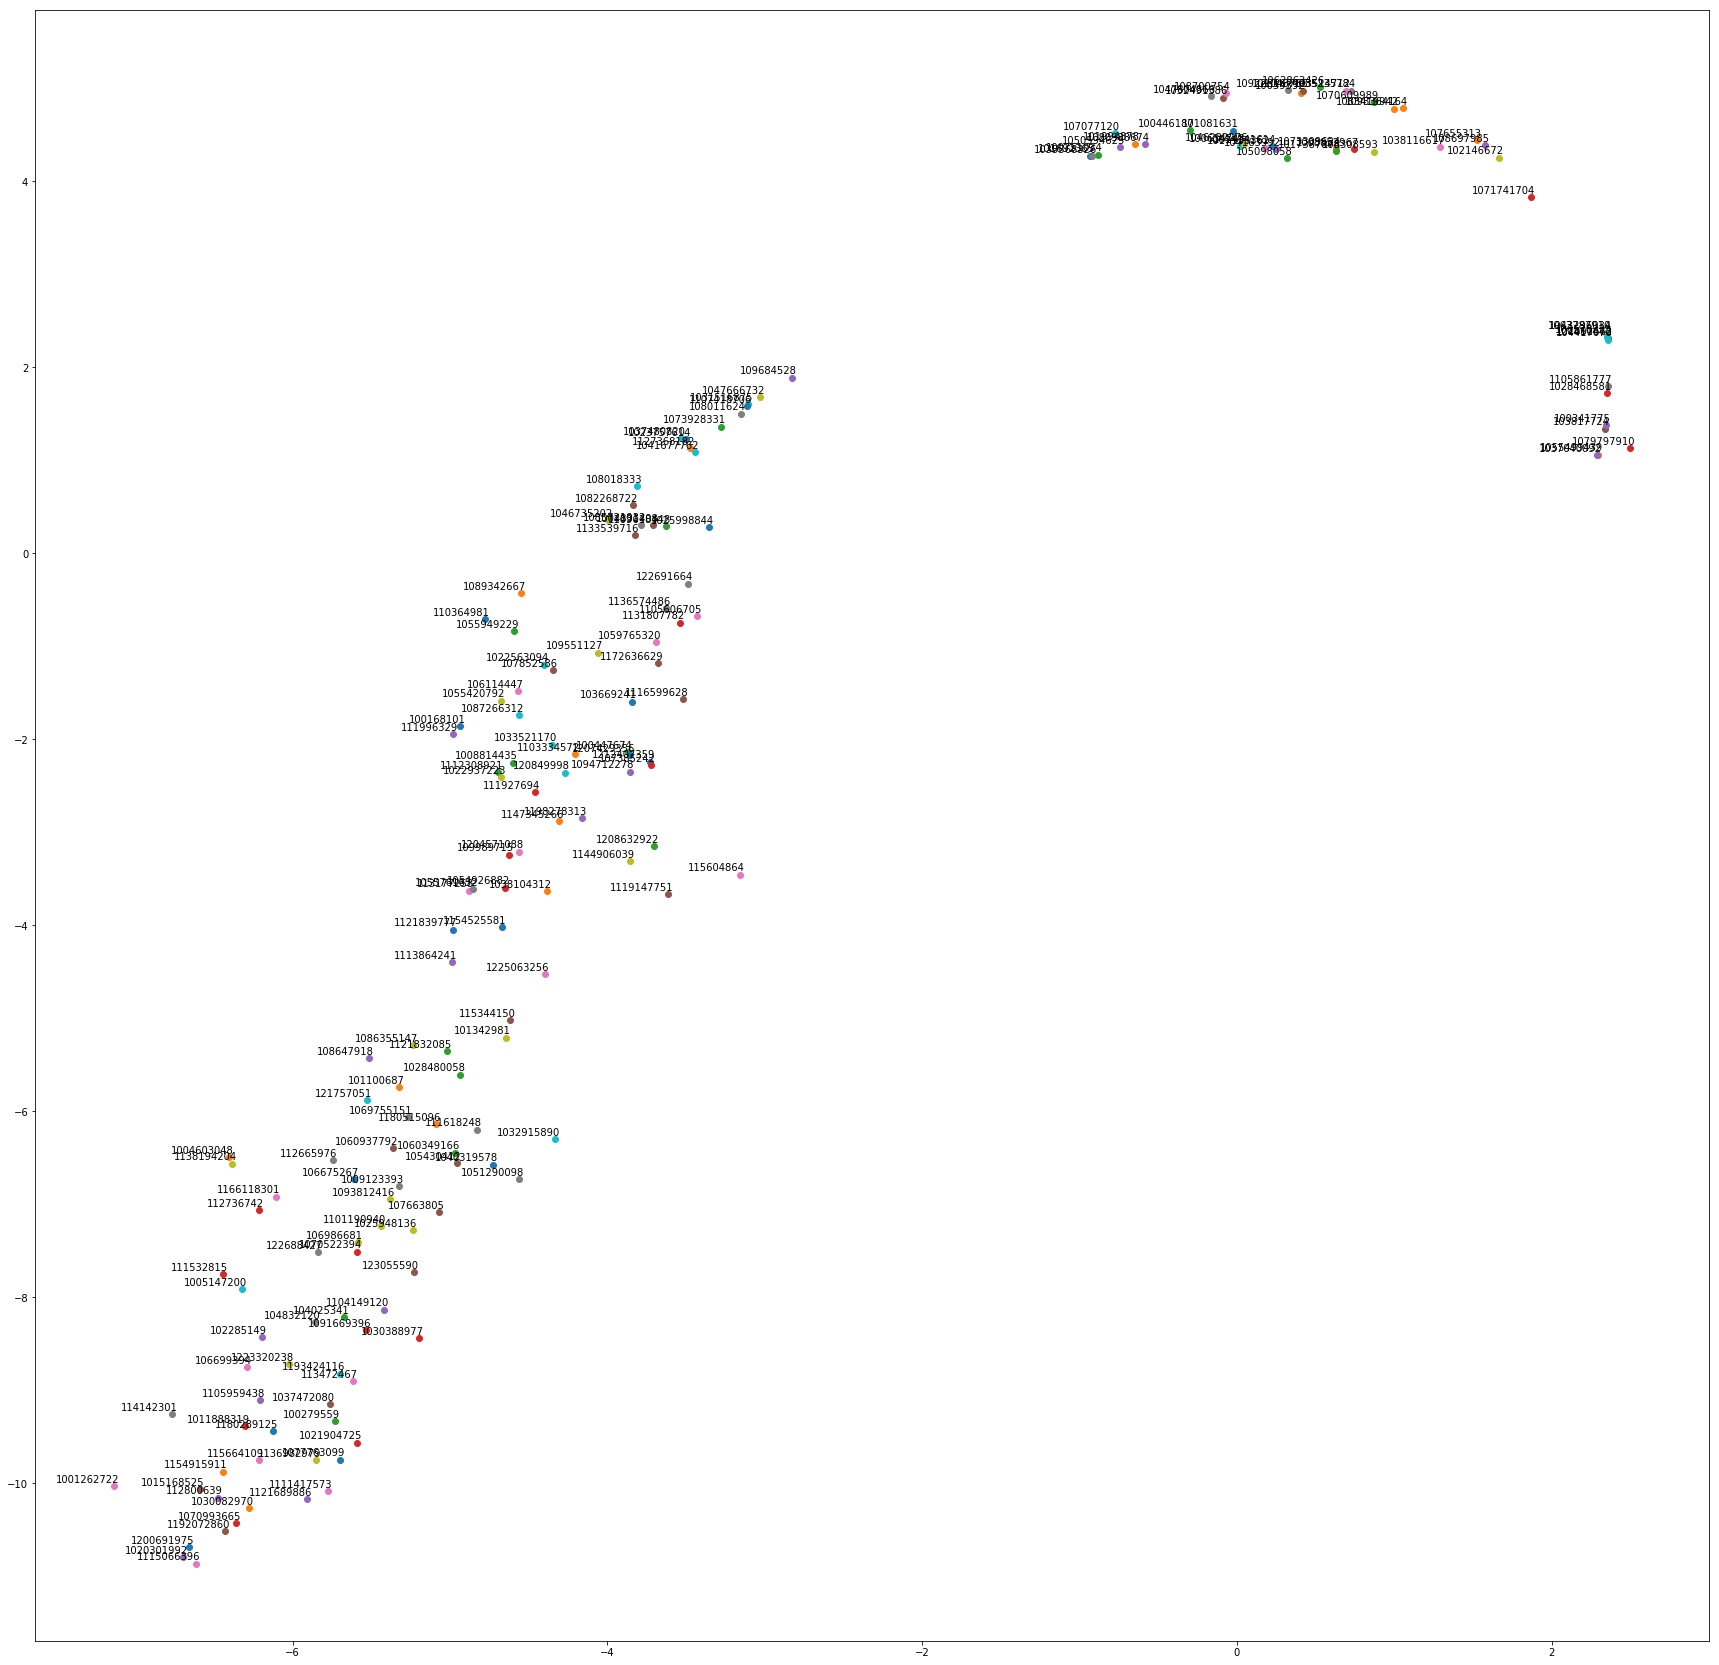

In [52]:
tsne_plot(model)

In [53]:
# load saved model and test it
model2 = W2V.load(MODEL_PATH)
model2.wv.most_similar("100341775")

[('1028468581', 0.9951112866401672),
 ('1050594625', 0.992255687713623),
 ('105098058', 0.9921977519989014),
 ('101994878', 0.992003321647644),
 ('1008852967', 0.9918087720870972),
 ('100634743', 0.9917500019073486),
 ('1083419942', 0.9916254281997681),
 ('1017387878', 0.9916032552719116),
 ('1035568326', 0.9915509223937988),
 ('1046232276', 0.9914882183074951)]

In [94]:
def n2v_eliorcPython3():# train, create new node2ve model
    friendshipN2V = Node2Vec(friendshipGraph, dimensions=64, walk_length=20, num_walks=100, workers=2)
    # run/fit word2vec algorithm and get wv model
    model = friendshipN2V.fit(window=10, min_count=1, batch_words=4)
    model.wv.save_word2vec_format("../outputs/friendship_vw_format.model")

    # Save model for later use
    model.save("../outputs/friendship.model")
    nx.draw_networkx(friendshipGraph,width=0.5,node_size=80,font_size=8,with_labels=True)